# 1. Read Dataset

In [1]:
import pandas as pd
A = pd.read_csv("C:/Users/LENOVO/Desktop/ML/loan_pred/training_set.csv")

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
A.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 2. Missing Data Treatment

In [4]:
from PM8wd import replacer
replacer(A)

# 3. Define X and Y

In [5]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)

# 4. EDA

Ycat,Xcon --> ANOVA
Ycat,Xcat --> chisquare

# 5. Divide Data to con & cat

In [6]:
cat = []
con = []
for i in X.columns: 
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [7]:
from PM8 import ANOVA,chisquare

for i in con:
    print("---------","Loan_Status vs",i,"---------")
    print(ANOVA(A,"Loan_Status",i))

--------- Loan_Status vs ApplicantIncome ---------
0.903
--------- Loan_Status vs CoapplicantIncome ---------
0.142
--------- Loan_Status vs LoanAmount ---------
0.368
--------- Loan_Status vs Loan_Amount_Term ---------
0.604
--------- Loan_Status vs Credit_History ---------
0.0


In [8]:
chisquare

<function PM8.chisquare(df, cat1, cat2)>

In [9]:
ANOVA

<function PM8.ANOVA(df, cat, con)>

In [10]:
for i in cat:
    print("----------","Loan_Status vs",i,"-----------")
    print(chisquare(A,"Loan_Status",i))

---------- Loan_Status vs Gender -----------
0.7391461310869638
---------- Loan_Status vs Married -----------
0.029608580862582116
---------- Loan_Status vs Dependents -----------
0.3688663081366005
---------- Loan_Status vs Education -----------
0.04309962129357355
---------- Loan_Status vs Self_Employed -----------
1.0
---------- Loan_Status vs Property_Area -----------
0.0021360187811644915


# 6. Outliers

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [12]:
ss.fit(X[con])

StandardScaler()

In [13]:
X1 = pd.DataFrame(ss.transform(X[con]),columns=con)

In [14]:
X1.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072651,-0.554368,0.000000,0.279851,0.45164
1,0.000000,-0.038610,-0.219273,0.279851,0.45164


In [15]:
from PM8wd import outliers
OL = outliers(X1)

In [16]:
X = X.drop(index=OL,axis=0)
Y = Y.drop(index=OL,axis=0)

In [17]:
X.index = range(0,X.shape[0])
Y.index = range(0,Y.shape[0])

# 7. Preprocessing

In [18]:
from PM8wd import preprocessing
Xnew = preprocessing(X)

In [19]:
Xnew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.398479,-0.860843,0.184585,0.239408,0.456461,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.248823,0.053073,-0.143355,0.239408,0.456461,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.562989,-0.860843,-1.247642,0.239408,0.456461,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.703717,0.568211,-0.285844,0.239408,0.456461,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.449438,-0.860843,0.088189,0.239408,0.456461,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.596737,-0.860843,-1.158587,0.239408,0.456461,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
573,-0.189741,-0.860843,-1.710730,-3.237229,0.456461,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
574,1.148688,-0.715392,2.083030,0.239408,0.456461,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
575,0.983662,-0.860843,0.907499,0.239408,0.456461,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)


In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)

model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [22]:
tr_acc

0.8134490238611713

In [23]:
ts_acc

0.8362068965517241

In [24]:
Xnew.shape

(577, 20)

# 8. Tree Model

In [25]:
X = X[["Credit_History","CoapplicantIncome","Property_Area","Education","Married"]]

In [26]:
Xnew = preprocessing(X)

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [28]:
Xnew.shape

(577, 9)

In [29]:
#Xnew.head(3)

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)

model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [31]:
tr_acc

0.8134490238611713

In [32]:
ts_acc

0.8362068965517241

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion="entropy",random_state=21,max_depth=3)
model = rfc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [34]:
tr_acc

0.8134490238611713

In [35]:
ts_acc

0.8448275862068966

# 9. Grid Search_CV

In [36]:
tuning_grid = {"max_depth":range(2,5,1),"criterion":["gini","entropy"],"n_estimators":range(20,30,1)}

In [37]:
tuning_grid = {"max_depth":range(2,5,1),"criterion":["gini","entropy"],"n_estimators":range(20,30,1)}

In [38]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
cv = GridSearchCV(rfc,tuning_grid,scoring="accuracy",cv=4)

cvmodel = cv.fit(xtrain,ytrain)

In [39]:
cvmodel.best_params_

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 20}

In [40]:
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [41]:
tr_acc

0.9023861171366594

In [42]:
ts_acc

0.7844827586206896

# 10. Getting Data ready for prediction

In [43]:
B = pd.read_csv("C:/Users/LENOVO/Desktop/ML/loan_pred/testing_set.csv")

In [44]:
B1 = B[X.columns].head()

In [45]:
B1

,Credit_History,CoapplicantIncome,Property_Area,Education,Married
0,1.0,0,Urban,Graduate,Yes
1,1.0,1500,Urban,Graduate,Yes
2,1.0,1800,Urban,Graduate,Yes
3,NaN,2546,Urban,Graduate,Yes
4,1.0,0,Urban,Not Graduate,No


# 11. Missing Data Treatment

In [46]:
B1.isna().sum()

Credit_History       1
CoapplicantIncome    0
Property_Area        0
Education            0
Married              0
dtype: int64

In [47]:
replacer(B1)

In [48]:
replacer(B)

In [49]:
cat = []
con = []
for i in B.columns:
    if(B[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [50]:
#B.head(10)

In [51]:
#B1.head()

In [52]:
B1 = pd.DataFrame(ss.transform(B[con]),columns=con)
B2 = pd.get_dummies(B[cat])
Bnew = B1.join(B2)

In [53]:
#Bnew.head()

In [54]:
#Xnew.columns

In [55]:
ready_for_pred = Bnew[Xnew.columns]

In [56]:
predicted_final = model.predict(ready_for_pred)

In [57]:
E = pd.DataFrame([B.Loan_ID,predicted_final]).T
E.columns = ["Loan_ID","Loan_Status"]

In [58]:
E.to_csv("C:/Users/LENOVO/Desktop/loan_pred_submission.csv")

In [59]:
E.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


# A) If customer is not eligible for the input required amount and duration

## a.)What can be amount for the given duration.(Regression)

In [60]:
B['Loan_Status'] = predicted_final

In [61]:
B.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# B)Find out people for whom loan was rejected(testing set)

In [62]:
xtest = B[B.Loan_Status == "N"]
xtest_1 = xtest.drop(labels=['Loan_ID','LoanAmount','Loan_Status'],axis=1)

In [63]:
xtest_1.index = range(0,xtest_1.shape[0])

In [64]:
#xtest_1

## Create training data based on above predictors

In [65]:
Q = A[xtest_1.columns]
Q['LS'] = A.Loan_Status

In [66]:
Q = Q[Q.LS == "Y"]
Q = Q.drop(labels=["LS"],axis=1)

In [67]:
R = A[["LoanAmount"]]
R = R.iloc[Q.index,:]
R.index = range(0,R.shape[0])

In [68]:
Q.shape[0]

422

In [69]:
Q.index = range(0,Q.shape[0])

# Preprocessing

In [70]:
replacer(Q)
replacer(xtest_1)

In [71]:
from PM8wd import preprocessing
xtrain = preprocessing(Q)
xtest_final = preprocessing(xtest_1)

In [72]:
ytrain = R.LoanAmount

In [73]:
ytrain.head(3)

0    146.412162
1     66.000000
2    120.000000
Name: LoanAmount, dtype: float64

# Regression Model

In [74]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest_final)

In [75]:
pred.shape

(105,)

In [76]:
act = B[B.Loan_Status == "N"][["LoanAmount"]]

In [77]:
act.index = range(0,105)

In [78]:
E = range(0,105)

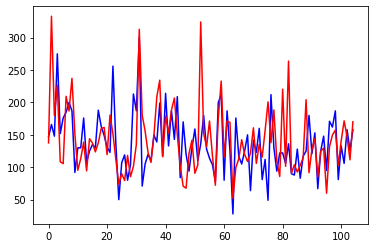

In [79]:
import matplotlib.pyplot as plt
plt.plot(act,c= "blue")
plt.plot(pred,c= "red")

# if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)¶

In [80]:
B['Duration'] =  B.Loan_Amount_Term/12

In [81]:
data_for_pred = B[(B.Duration<=20) & (B.Loan_Status=="Y")]
data_for_pred_final = data_for_pred.drop(labels=['Duration','Loan_ID','Loan_Status',"Loan_Amount_Term"],axis=1)
data_for_pred_final.index = range(0,data_for_pred_final.shape[0])

In [82]:
data_for_pred_final.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,Yes,2,Graduate,No,13633,0,280.0,1.000000,Urban
1,Male,No,3+,Graduate,No,4166,0,40.0,0.825444,Urban


# Prepare training data

In [83]:
T = A[A.Loan_Status == "Y"]
T1 = T[data_for_pred_final.columns]
T1.index = range(0,T1.shape[0])

In [84]:
xtrain = preprocessing(T1)

In [85]:
ytrain = T[["Loan_Amount_Term"]]

In [86]:
ytrain.index = range(0,ytrain.shape[0])

In [87]:
replacer(data_for_pred_final)
final_pred = preprocessing(data_for_pred_final)

In [88]:
model = lm.fit(xtrain,ytrain)
pred = model.predict(final_pred)

In [89]:
U = B[(B.Duration<=20)&(B.Loan_Status=="Y")][["Loan_Amount_Term"]]
U.index = range(0,U.shape[0])

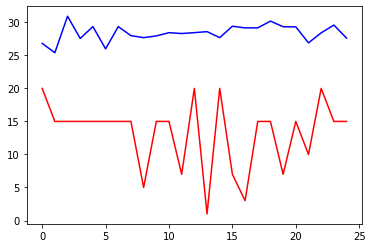

In [90]:
plt.plot(U/12,c="red")
plt.plot(pred/12,c="blue")

In [91]:
U.shape

(25, 1)

In [92]:
pred.shape

(25, 1)

In [93]:
U

,Loan_Amount_Term
0,240.0
1,180.0
2,180.0
3,180.0
4,180.0
5,180.0
6,180.0
7,180.0
8,60.0
9,180.0


# ---------------------------------------------------------------------------------------------------------------